# Notebook de Análisis Exploratorio de Datos en Google Colab

Este Notebook de Análisis Exploratorio de Datos en Google Colab tiene como propósito guiar a los participantes del diplomado a través de un proceso sistemático para explorar y comprender conjuntos de datos. Desde la identificación de patrones y tendencias hasta la detección de valores atípicos y la generación de conclusiones significativas, este recurso proporciona herramientas esenciales para el análisis de datos, adecuado tanto para principiantes como para expertos.

In [14]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_columns',None)

In [15]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Dentro de la carpeta de google colab deben crear una carpeta con el nombre **Analitica de Datos UJaveriana**.

In [16]:
# Configurar directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks/Analitica de Datos UJaveriana')

# Verificar los archivos de las carpetas
!ls

Analisis-Exploratorio-de-Datos.ipynb  bank_marketing.csv


## Descripción de los datos

Estas son las variables en el conjunto de datos "Bank Marketing", con una breve descripción de cada una:

**Variables de Entrada (Input Variables):**

1. **Edad (age):** Representa la edad de los clientes, es una variable numérica.
2. **Ocupación (job):** Indica el tipo de trabajo del cliente, es una variable categórica que incluye categorías como "administración", "desconocido", "desempleado", "gerencia", etc.
3. **Estado Civil (marital):** Describe el estado civil del cliente, es una variable categórica con categorías como "casado", "divorciado", "soltero".
4. **Educación (education):** Representa el nivel de educación del cliente, es una variable categórica que incluye categorías como "desconocido", "secundaria", "primaria", "terciaria".
5. **Incumplimiento en crédito (default):** Indica si el cliente tiene crédito en situación de incumplimiento o no, es una variable binaria ("sí" o "no").
6. **Saldo (balance):** Representa el saldo promedio anual en euros en la cuenta del cliente, es una variable numérica.
7. **Préstamo de Vivienda (housing):** Indica si el cliente tiene un préstamo hipotecario o no, es una variable binaria.
8. **Préstamo Personal (loan):** Indica si el cliente tiene un préstamo personal o no, es una variable binaria.

**Variables Relacionadas con la Última Comunicación de la Campaña Actual:**

9. **Medio de Contacto (contact):** Describe el tipo de comunicación de contacto, es una variable categórica que incluye categorías como "desconocido", "teléfono", "celular".
10. **Día (day):** Representa el día del mes que fue contactado la última vez, es una variable numérica.
11. **Mes (month):** Indica el mes del año del último contacto, es una variable categórica que utiliza abreviaciones de meses ("jan", "feb", ..., "nov", "dic").
12. **Duración (duration):** Representa la duración del último contacto en segundos, es una variable numérica.

**Otras Atributos (Other Attributes):**

13. **Campaña (campaign):** Indica el número de contactos realizados durante esta campaña para este cliente, es una variable numérica.
14. **Días desde el Último Contacto (pdays):** Representa el número de días desde el último contacto de una campaña anterior para este cliente, es una variable numérica donde -1 significa que el cliente no fue contactado previamente.
15. **Contactos Previos (previous):** Indica el número de contactos realizados antes de esta campaña para este cliente, es una variable numérica.
16. **Resultado de la Campaña Anterior (poutcome):** Describe el resultado de la campaña de marketing anterior, es una variable categórica que incluye categorías como "desconocido", "otro", "fracaso", "éxito".

**Variable de Salida (Output Variable):**

17. **Subscripción a Depósito a Plazo (subscribed):** Indica si el cliente se ha suscrito o no a un depósito a plazo (similar a un CDT), es una variable binaria ("sí" o "no").

Este conjunto de datos es valioso para comprender el comportamiento de los clientes y predecir si se suscribirán a un depósito a plazo, lo que lo hace relevante para tareas de análisis y predicción en el ámbito financiero.

In [17]:
# Cargar datos
datos = pd.read_csv('bank_marketing.csv')

# Visualizar los primeros 10 registros
datos.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


A continuación, se presenta la información general de la tabla de datos, la cual proporciona la siguiente información:

- La salida proporcionada representa la estructura de un DataFrame en Pandas.
- Este DataFrame contiene un total de 45211 filas y 17 columnas.
- Cada columna tiene su nombre bajo la etiqueta "Column", y se muestra la cantidad de valores no nulos bajo "Non-Null Count".
- El tipo de datos de cada columna se especifica bajo "Dtype".

Esta información es esencial para comprender la organización de los datos y su preparación para análisis posteriores. A continuación, una descripción de los tipos de datos en Pandas:

1. **int64 e int32:** Representan números enteros de 64 y 32 bits respectivamente, con `int64` permitiendo un rango de valores más amplio.

2. **float64 y float32:** Representan números de punto flotante (decimales) de 64 y 32 bits, donde `float64` es más preciso.

3. **object:** Se usa para datos de texto y mixtos, pero es menos eficiente en memoria.

4. **datetime64:** Para representar fechas y horas con capacidades de cálculo de tiempo.

5. **bool:** Representa valores booleanos True (verdadero) o False (falso).

6. **category:** Utilizado para columnas con un conjunto limitado de categorías únicas, optimizando el uso de memoria.

7. **timedelta64:** Representa duraciones o diferencias de tiempo.

8. **int8, int16, float16, etc.:** Tipos de datos enteros y de punto flotante con diferentes tamaños de bits para ahorrar memoria cuando la precisión total no es necesaria.

In [18]:
# Información general de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  subscribed   45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Resumen de la variable de interés

¿Cuántos clientes tomaron el producto ofrecido en la campaña?

In [19]:
# Conteo de una variable categorica
datos['subscribed'].value_counts()

no     39922
yes     5289
Name: subscribed, dtype: int64

¿Qué porcentaje representan?

In [20]:
# Fracción calculada respecto al total
datos['subscribed'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: subscribed, dtype: float64

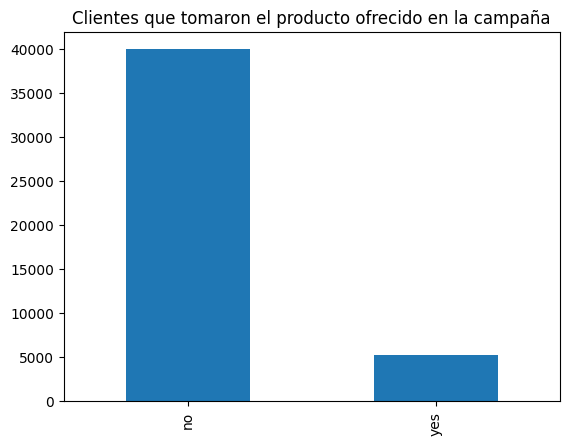

In [21]:
# Gráfico de barras
datos['subscribed'].value_counts().plot.bar()
plt.title('Clientes que tomaron el producto ofrecido en la campaña')
plt.show()

<Axes: ylabel='subscribed'>

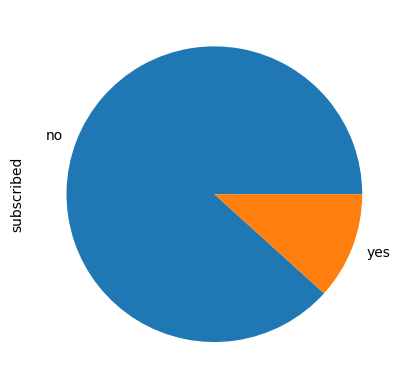

In [22]:
# Gráfico de torta
datos['subscribed'].value_counts().plot.pie()

## Resumen estadístico de variables numéricas

La función `describe()` de Pandas proporciona un resumen estadístico rápido de un DataFrame o una serie. El resumen incluye:

- **Recuento (count):** El número de elementos no nulos en la serie o columna.

- **Media (mean):** El valor promedio de los elementos.

- **Desviación estándar (std):** Una medida de la dispersión de los valores con respecto a la media.

- **Valor mínimo (min):** El valor más pequeño en la serie o columna.

- **Cuartil 25% (25%):** El valor que divide el 25% inferior de los datos.

- **Mediana (50%):** El valor que divide los datos en dos mitades iguales (el percentil 50).

- **Cuartil 75% (75%):** El valor que divide el 25% superior de los datos.

- **Valor máximo (max):** El valor más grande en la serie o columna.

Este resumen estadístico proporciona una instantánea rápida de la distribución y la dispersión de los datos en la serie o columna, lo que es útil para comprender la naturaleza de los datos y detectar valores atípicos.

## Análisis de la edad

Algunas preguntas analíticas que se pueden plantear en el EDA son:

- ¿Cuál es la distribución de edades en el conjunto de datos?
- ¿Cuál es la edad promedio de los clientes?
- ¿Existe una relación significativa entre la edad y la suscripción a un depósito a plazo?
- ¿Cómo se distribuyen las edades entre los clientes que se suscriben y los que no lo hacen?
- ¿Cómo se correlaciona la edad con otras variables importantes, como el estado civil o el nivel de educación de los clientes?

In [23]:
datos['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Tambien se pueden utilizar funciones de pandas para calcular estadísticas especificas en las columnas numéricas.

In [24]:
# Edad promedio
datos['age'].mean()

40.93621021432837

In [25]:
# Mediana de la edad
datos['age'].median()

39.0

In [26]:
# Edad mínima
datos['age'].min()

18

In [27]:
# Edad máxima
datos['age'].max()

95

In [28]:
# Desviación estandar
datos['age'].std()

10.61876204097542

In [29]:
# Cuartiles
datos['age'].quantile([0.25,0.50,0.75])

0.25    33.0
0.50    39.0
0.75    48.0
Name: age, dtype: float64

In [30]:
# Cantidad de datos no nulos
datos['age'].count()

45211

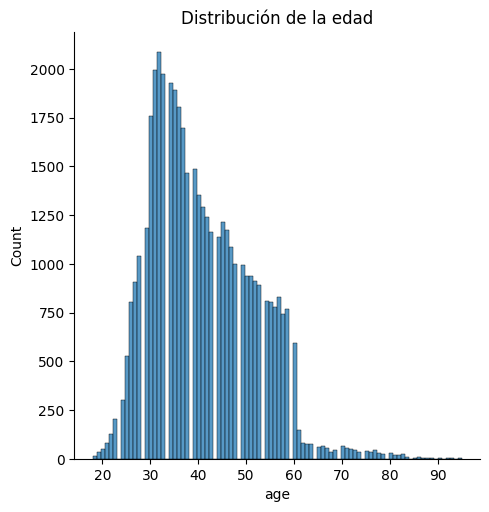

In [31]:
# Histograma
sns.displot(data=datos, x='age')
plt.title("Distribución de la edad")
plt.show()

In [32]:
# Distribución de frecuencia
pd.cut(x=datos['age'], bins=[10,20,30,40,50,60,70,80,90,100]).value_counts(sort=False)

(10, 20]        97
(20, 30]      6933
(30, 40]     17687
(40, 50]     11239
(50, 60]      8067
(60, 70]       701
(70, 80]       388
(80, 90]        92
(90, 100]        7
Name: age, dtype: int64

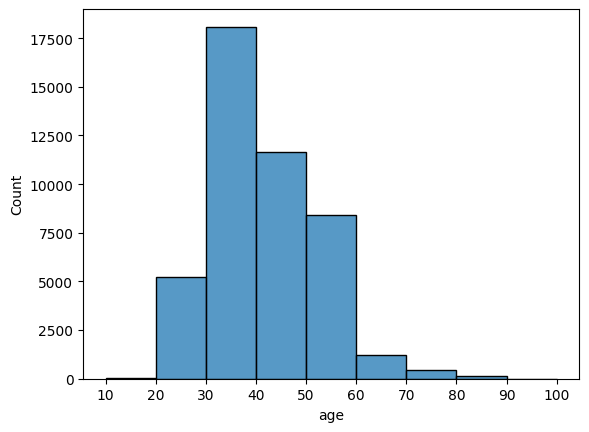

In [33]:
# Histograma
sns.histplot(data=datos, x='age', bins=[10,20,30,40,50,60,70,80,90,100])
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.show()

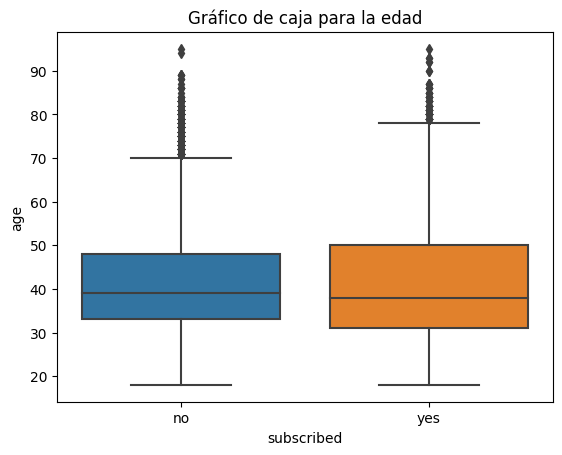

In [34]:
# Gráfico de caja para mirar la relación entre edad y suscritos
sns.boxplot(data=datos, x='subscribed', y='age')
plt.title('Gráfico de caja para la edad')
plt.show()

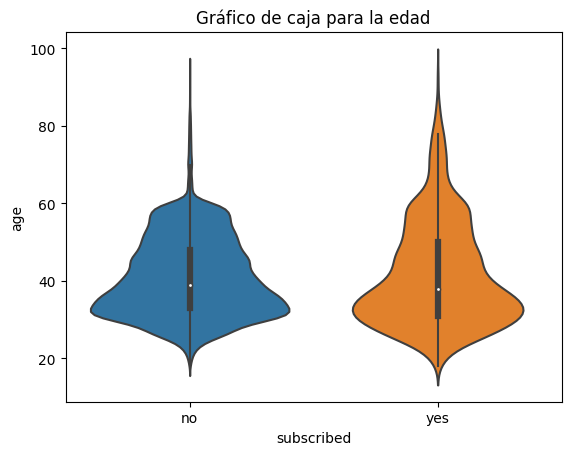

In [35]:
# Gráfico de caja para mirar la relación entre edad y suscritos
# La distribución de edad en cada grupo
sns.violinplot(data=datos, x='subscribed', y='age')
plt.title('Gráfico de caja para la edad')
plt.show()

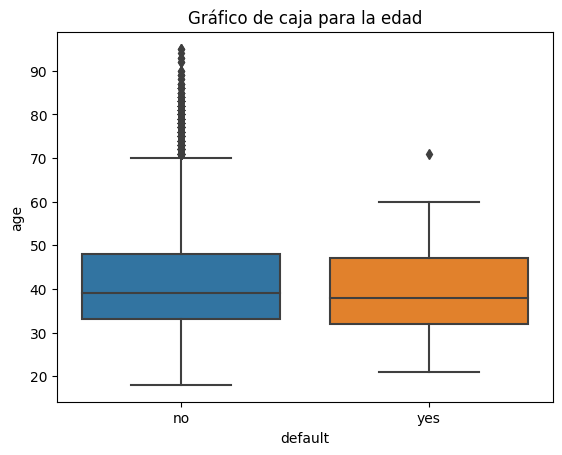

In [36]:
# Gráfico de caja para mirar la relación entre edad y clientes con incumplimientos en pagos de creditos (default)
sns.boxplot(data=datos, x='default', y='age')
plt.title('Gráfico de caja para la edad')
plt.show()

## Análisis del saldo (balance)

Ahora presente un análisis del saldo de los cliente. Presente las principales estadísticas, la distribución de frecuencia. Plantee por lo menos tres preguntas analíticas.

In [37]:
# Resumen estadístico


In [38]:
# Distribución de frecuencia


In [39]:
# Histograma


In [40]:
# Gráfico de caja


**Conclusión (presente sus conclusiones):** ...




## Análisis de variable ocupación

In [41]:
# Tabla de frecuencia
datos['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [42]:
# Pipelines
(
    datos['job']
    .value_counts(dropna=False)
    .reset_index(name='Total')
    .assign(Porcentaje = lambda df: (df['Total']/df['Total'].sum())*100,
            Porcentaje_Acumulado = lambda df: df['Porcentaje'].cumsum())
)

,index,Total,Porcentaje,Porcentaje_Acumulado
0,blue-collar,9732,21.525735,21.525735
1,management,9458,20.919688,42.445423
2,technician,7597,16.803433,59.248855
3,admin.,5171,11.437482,70.686337
4,services,4154,9.188029,79.874367
5,retired,2264,5.007631,84.881998
6,self-employed,1579,3.492513,88.374511
7,entrepreneur,1487,3.289023,91.663533
8,unemployed,1303,2.882042,94.545575
9,housemaid,1240,2.742695,97.288271


In [43]:
# Tabla de frecuencia incluyendo datos faltantes
datos['job'].value_counts(dropna=False)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: job, dtype: int64

<Axes: >

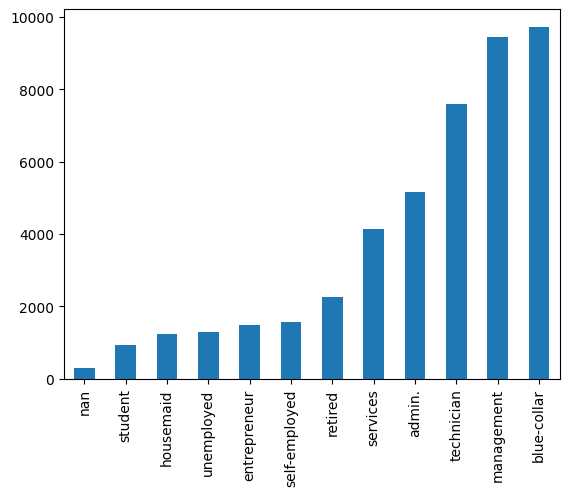

In [44]:
# Gráfico de barras verticales
datos['job'].value_counts(dropna=False).sort_values(ascending=True).plot.bar()

<Axes: >

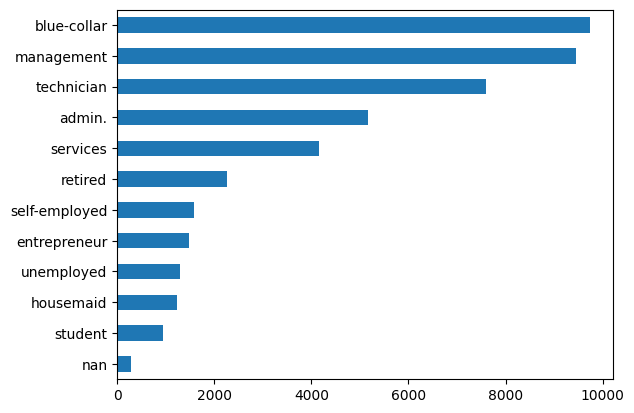

In [45]:
# Gráfico de barras horizontales
datos['job'].value_counts(dropna=False).sort_values(ascending=True).plot.barh()

In [46]:
# Tabla cruzada con las variables job y subscribed
datos.pivot_table(index='job', columns='subscribed', values='balance', aggfunc='count')

subscribed,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [47]:
# Tabla cruzada con porcentajes con respecto al total por filas
datos.pivot_table(index='job', columns='subscribed', values='balance', aggfunc='count').apply(lambda df:(df/df.sum())*100, axis=1)

subscribed,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


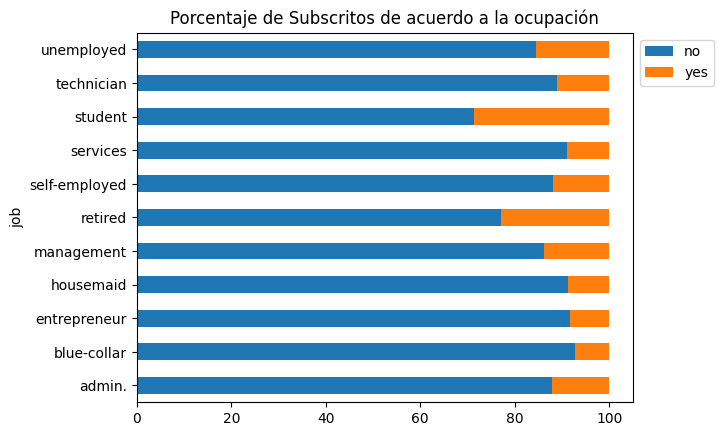

In [48]:
# Gráficos de barras
(
    datos
    .pivot_table(index='job', columns='subscribed', values='balance', aggfunc='count')
    .apply(lambda df:(df/df.sum())*100, axis=1)
    .plot
    .barh(stacked=True)
)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Porcentaje de Subscritos de acuerdo a la ocupación')
plt.show()

## Análisis de prestamos de vivienda y personal

In [49]:
# Tabla cruzada prestamo de vivienda vs subscripción


In [50]:
# Gráfico de barras apiladas


In [51]:
# Tabla cruzada prestamo personal vs subscripción


In [52]:
# Gráfico de barras apiladas


**Conclusion:** ...

## Relación de la campaña anterior con la actual

In [53]:
# Estadísticas agrupadas
datos.groupby('poutcome')['previous'].describe()

,count,mean,std,min,25%,50%,75%,max
poutcome,,,,,,,,
failure,4901.0,2.896552,3.130252,1.0,1.0,2.0,3.0,55.0
other,1840.0,4.009239,7.799166,1.0,1.0,2.0,4.0,275.0
success,1511.0,3.075447,2.593854,1.0,1.0,2.0,4.0,28.0


<Axes: xlabel='poutcome', ylabel='previous'>

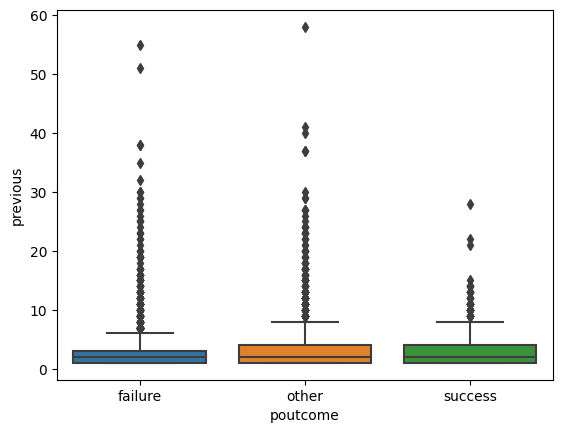

In [54]:
# Gráficos de caja comparativos
sns.boxplot(data=datos.loc[datos['previous'] < 60], x='poutcome', y='previous')

In [55]:
# Estadísticas agrupadas del número de contactos en la campaña anterior y el resultado de la campaña actual
datos.loc[datos['previous'] >= 1].groupby('subscribed')['previous'].describe()

,count,mean,std,min,25%,50%,75%,max
subscribed,,,,,,,,
no,6352.0,3.156014,4.861754,1.0,1.0,2.0,4.0,275.0
yes,1905.0,3.249344,3.368521,1.0,1.0,2.0,4.0,58.0


<Axes: xlabel='subscribed', ylabel='previous'>

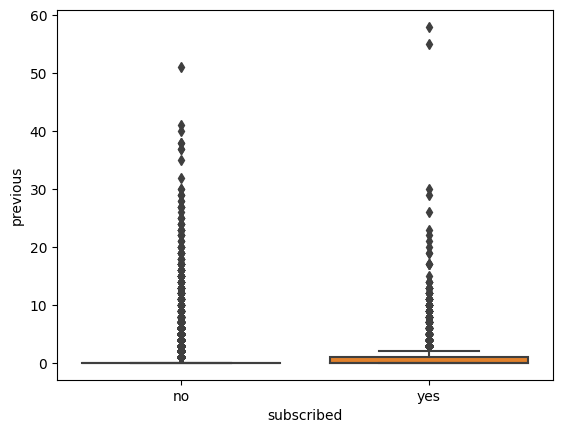

In [56]:
# Gráfico de caja
sns.boxplot(data=datos.loc[datos['previous'] < 60], x='subscribed', y='previous')

In [57]:
# Discretización de la variable previous
datos['previous range'] = pd.cut(x=datos['previous'], bins=[-2,0,10,20,30,40,60,np.infty])

In [58]:
# Tabla de frecuencia
datos.pivot_table(index='previous range', columns='subscribed', values='balance', aggfunc='count').assign(Total = lambda df: df.sum(axis=1))

subscribed,no,yes,Total
previous range,,,
"(-2.0, 0.0]",33570,3384,36954
"(0.0, 10.0]",6112,1851,7963
"(10.0, 20.0]",193,46,239
"(20.0, 30.0]",37,6,43
"(30.0, 40.0]",7,0,7
"(40.0, 60.0]",2,2,4
"(60.0, inf]",1,0,1


In [59]:
# Tabla de frecuencia
datos.pivot_table(index='previous range', columns='subscribed', values='balance', aggfunc='count').apply(lambda df:(df/df.sum())*100, axis=1)

subscribed,no,yes
previous range,,
"(-2.0, 0.0]",90.842669,9.157331
"(0.0, 10.0]",76.754992,23.245008
"(10.0, 20.0]",80.753138,19.246862
"(20.0, 30.0]",86.046512,13.953488
"(30.0, 40.0]",100.000000,0.000000
"(40.0, 60.0]",50.000000,50.000000
"(60.0, inf]",100.000000,0.000000


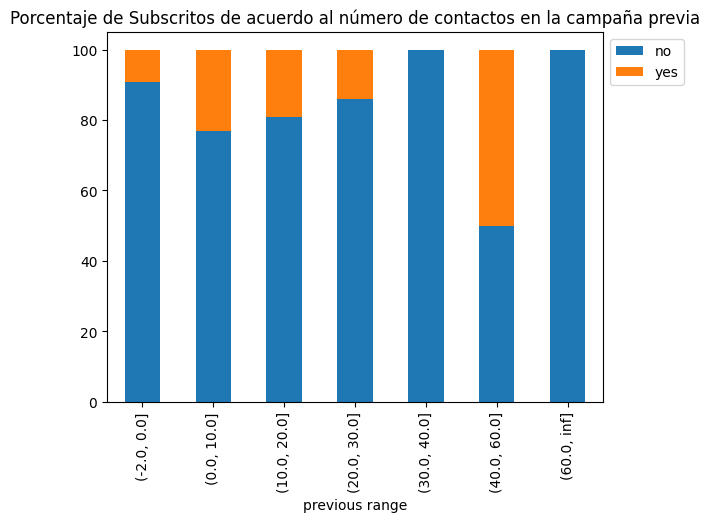

In [60]:
(
    datos
    .pivot_table(index='previous range', columns='subscribed', values='balance', aggfunc='count')
    .apply(lambda df:(df/df.sum())*100, axis=1)
    .plot
    .bar(stacked=True)
)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Porcentaje de Subscritos de acuerdo al número de contactos en la campaña previa')
plt.show()

## Datos faltantes

In [61]:
# Cuenta los datos faltantes por columna
datos.isna().sum()

age                   0
job                 288
marital               0
education          1857
default               0
balance               0
housing               0
loan                  0
contact           13020
day_of_week           0
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          36959
subscribed            0
previous range        0
dtype: int64

In [62]:
# Verifica que los datos faltantes en los Resultado de la Campaña Anterior (poutcome)
# este relacionado con el contacto previo (previous)
datos[['previous','poutcome']].value_counts(dropna=False)

previous  poutcome
0         NaN         36954
1         failure      1707
2         failure      1362
3         failure       660
1         other         591
                      ...  
21        failure         1
5         NaN             1
7         NaN             1
18        failure         1
275       other           1
Length: 92, dtype: int64

In [63]:
# Rellenar datos faltantes
datos.loc[(datos['previous'] == 0) & (datos['poutcome'].isnull()), ['poutcome']] = 'ncp'

## Transformaciones

<Axes: xlabel='balance', ylabel='Count'>

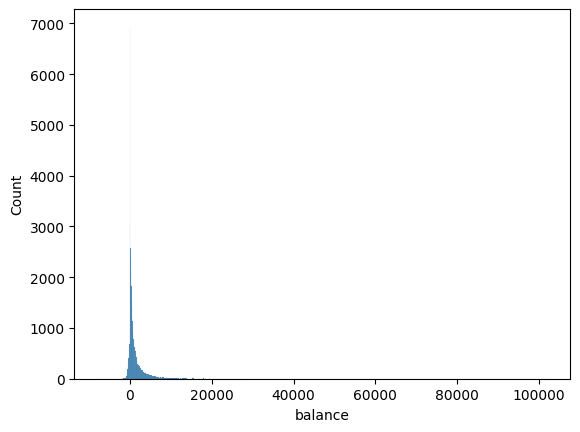

In [64]:
sns.histplot(data=datos, x='balance')

In [65]:
datos['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

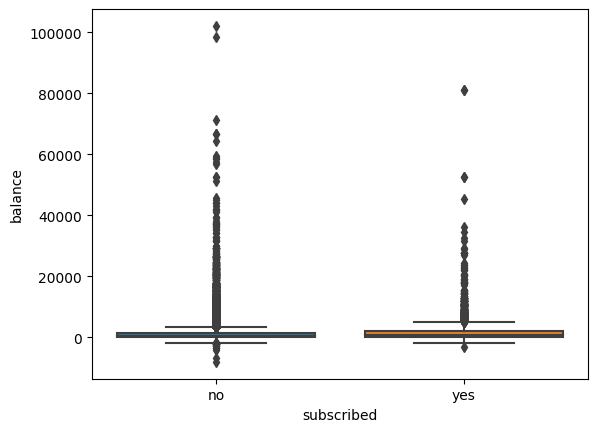

In [66]:
sns.boxplot(data=datos, x='subscribed', y='balance')
plt.show()

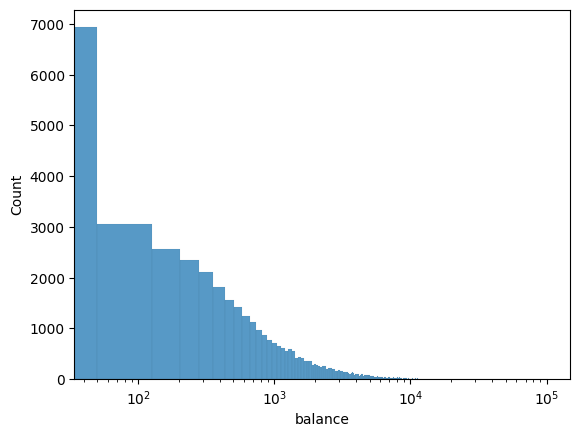

In [67]:
sns.histplot(data=datos, x='balance')
plt.xscale('log')
plt.show()

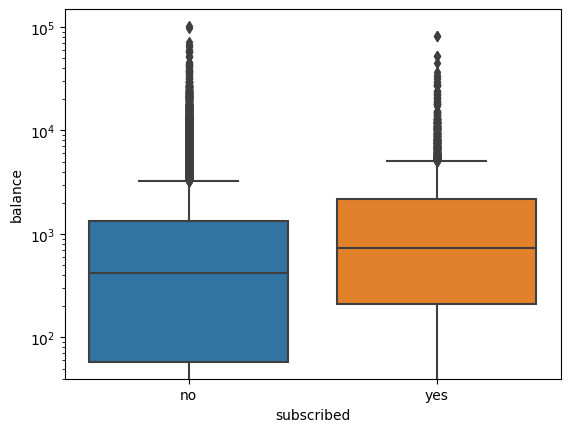

In [68]:
sns.boxplot(data=datos, x='subscribed', y='balance')
plt.yscale('log')
plt.show()